# Model inspection by pycaffe (caffe-segnet flavour)

## Setup:
1. Pull in functions from file:

2. Intialize net with model def and pre-trained weights

3. Pull in matplotlib - inline with Jupyter notebook

4. Populate a list of images to randomize over


In [4]:
%run classificationFns.py

In [6]:
model = '/home/nathan/mzmo/code/deploy.prototxt'
weights = '/home/nathan/mzmo/weights/local_alexnet_jan4_iter_50000.caffemodel'
# weights = '/home/nathan/mzmo/weights/bvlc_alexnet.caffemodel'
net = define_network(model, weights)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg #-- unneeded as we use OpenCV

In [8]:
img_path = '/home/nathan/mzmo/data/source/m1_256'
img_list = list_images(img_path)

## Plot layer activations
The function `plot_layers` plots the layers of the network passed in as string parameters.

Top: input image

The rest are hidden convolution and deconvolution layers. In the colormap, pure red = 1, and deep blue = 0. 

Each "blob" is a 3D tensor:

1st dimension ~ image width, 2nd dimension ~ image height, 3rd dimension ~ number of "kernels" in the convolution.

`np.amax` : maximum value along the 3rd dimension

`np.argmax` : location of the maximum value along the 3rd dimension

Image was classified as: 1
Plotting 6 figures
conv1, (1, 96, 55, 55)
conv2, (1, 256, 27, 27)
conv3, (1, 384, 13, 13)
conv4, (1, 384, 13, 13)
conv5, (1, 256, 13, 13)


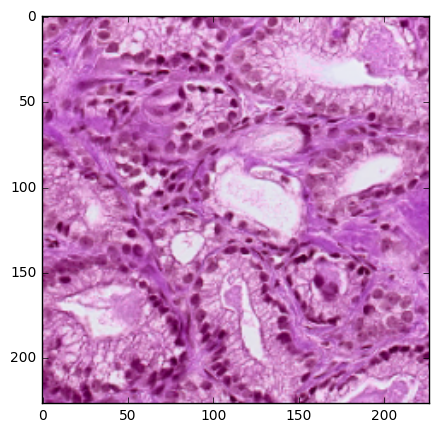

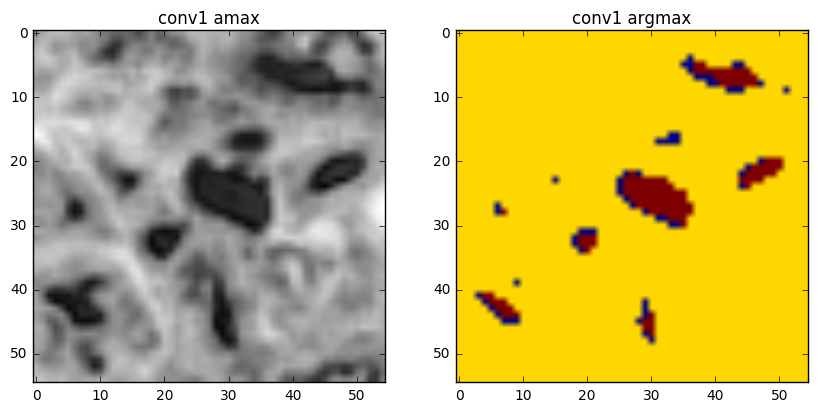

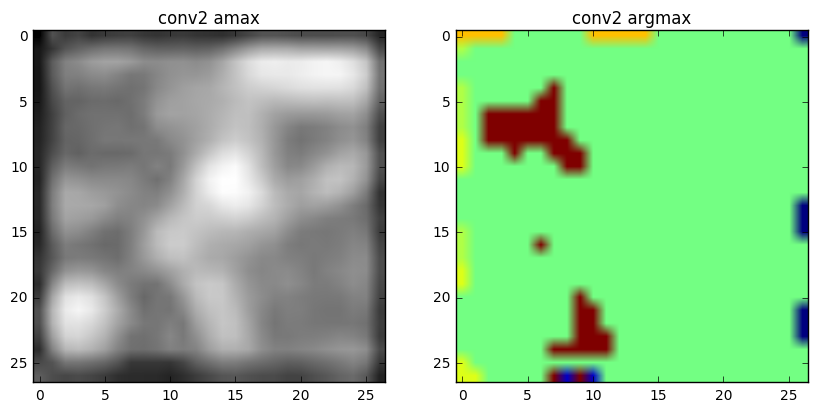

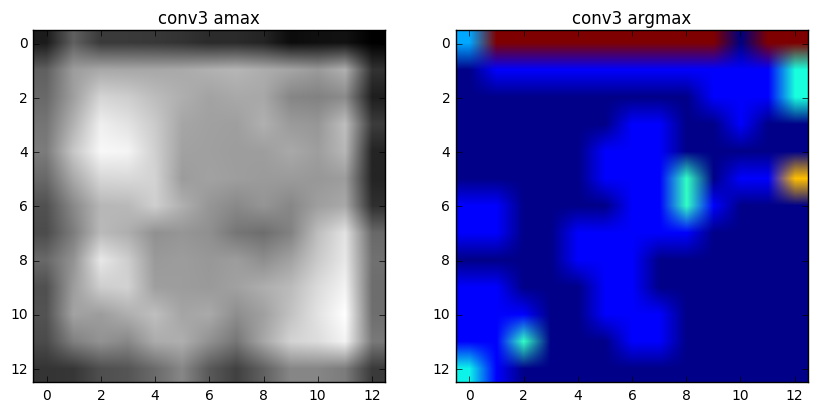

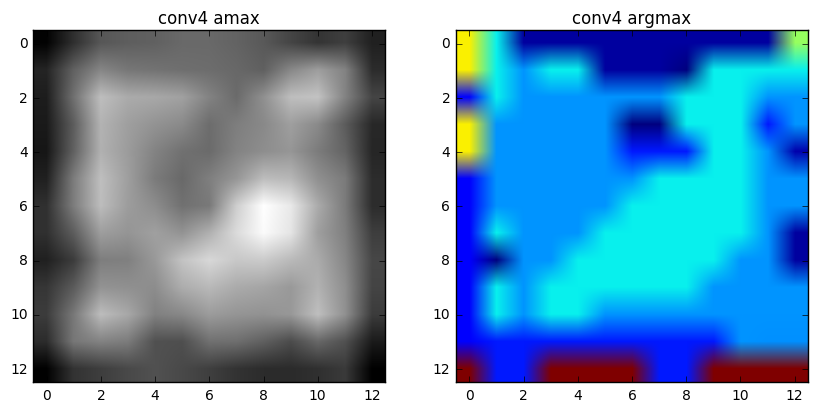

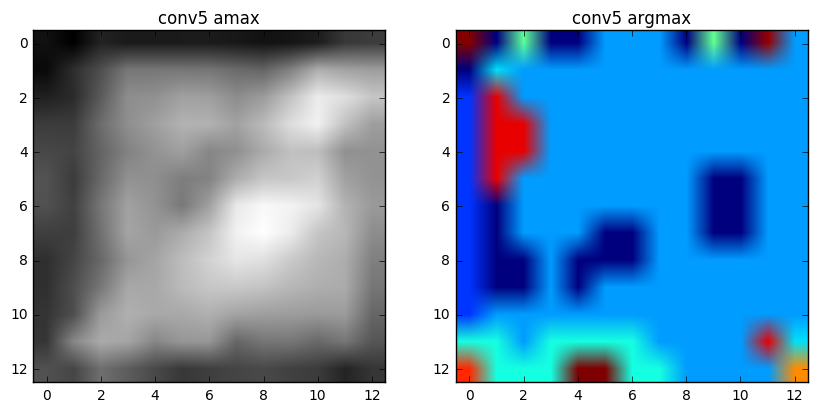

In [12]:
img_index = int(np.random.random()*len(img_list))
img = get_img(img_list[img_index], 227)
IMG_RAW = cv2.imread(img_list[img_index])

net,label = infer(net, img)

print 'Image was classified as: {}'.format(label)

plot_layers(net, layer_names = ['data', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5'])
